In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

from statistics_analysis.load_data import SimulationAnalyzer

Generate Statistics

In [2]:
def generate_statistics_table_by_team(team_data_analyzers):
    stats_df = pd.DataFrame(columns=['property', 'mean', 'std_dev', 'median', '25th_percentile', '50th_percentile'])

    points = []
    attacks = []
    passes = []
    errors = []
    serves = []

    for analyzer in team_data_analyzers:
        points.append(analyzer.points)
        serves.append(analyzer.serves)
        attacks.append(analyzer.attacks)
        passes.append(analyzer.sets)
        errors.append(analyzer.errors)

    for n, p in [('points', points), ('serves', serves), ('attacks', attacks), ('passes', passes),
                 ('errors', errors)]:
        mean = np.mean(p)
        std_dev = np.std(p)
        median = np.median(p)
        percentiles = np.percentile(p, [25, 50, 75])
        new_data = {
            'property': n,
            'mean': mean,
            'std_dev': std_dev,
            'median': median,
            '25th_percentile': percentiles[0],
            '50th_percentile': percentiles[1],
            '75th_percentile': percentiles[2]
        }
        new_data_df = pd.DataFrame([new_data])
        stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)

    return stats_df


def generate_statistics_player_by_team(team_data_analyzers, img_path: str):
    data = []

    for team_data in team_data_analyzers:
        for kp, vp in team_data.player_statistics.items():
            row = {'dorsal': kp}

            for k, v in vp.items():
                row[k] = v

            data.append(row)

    df = pd.DataFrame(data)

    statistics_mean = df.groupby('dorsal').mean()

    fig, ax = plt.subplots(figsize=(10, 6))
    statistics_mean.plot(kind='bar', ax=ax, width=1.5)

    ax.set_title('Statistics mean by player')
    ax.set_ylabel('Mean')
    ax.set_xlabel('Dorsal')

    # plt.show()
    plt.savefig(img_path)


def generate_statistics(simulation, img_path: str):
    t1 = [g.t1_data for g in simulation.games]
    t2 = [g.t2_data for g in simulation.games]

    display(generate_statistics_table_by_team(t1))
    generate_statistics_player_by_team(t1, img_path+'_t1'+'.png')

    display(generate_statistics_table_by_team(t2))
    generate_statistics_player_by_team(t2, img_path+'_t2'+'.png')



all_random

/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,68.0,0.0,68.0,68.0,68.0,68.0
3,passes,90.0,0.0,90.0,90.0,90.0,90.0
4,errors,62.0,0.0,62.0,62.0,62.0,62.0


/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,71.0,0.0,71.0,71.0,71.0,71.0
3,passes,55.0,0.0,55.0,55.0,55.0,55.0
4,errors,25.0,0.0,25.0,25.0,25.0,25.0


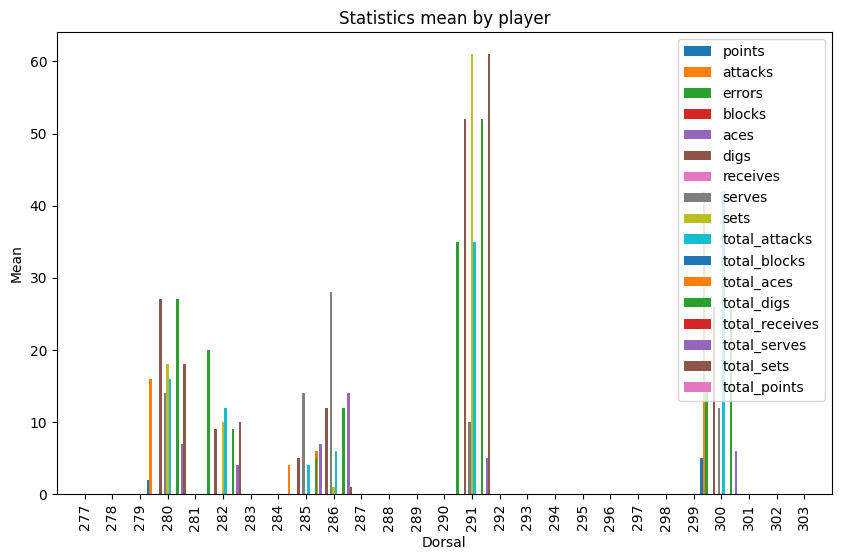

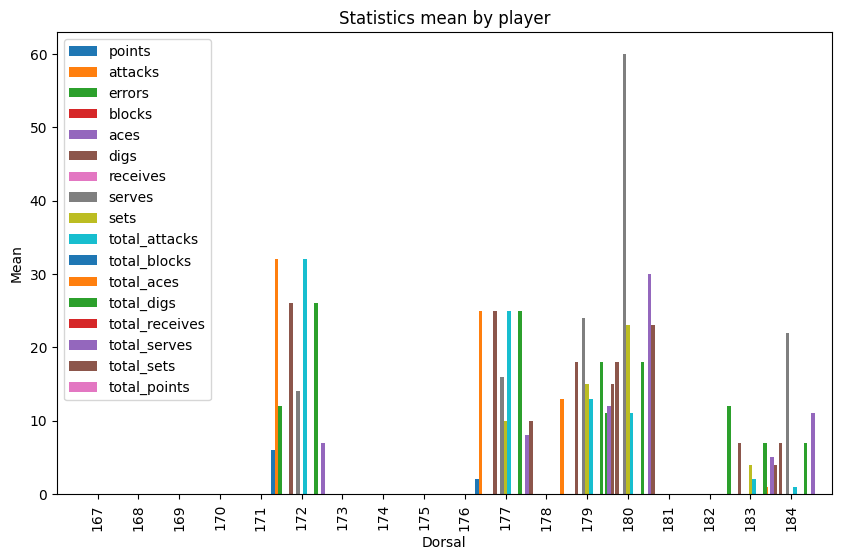

In [3]:
random_action_vs_random_action = SimulationAnalyzer('../data/all_random.json')
random_action_vs_random_action.analyze()

generate_statistics(random_action_vs_random_action, '../img/random_action_vs_random_action')

minimax_vs_minimax_action

/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,68.0,0.0,68.0,68.0,68.0,68.0
3,passes,90.0,0.0,90.0,90.0,90.0,90.0
4,errors,62.0,0.0,62.0,62.0,62.0,62.0


/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,71.0,0.0,71.0,71.0,71.0,71.0
3,passes,55.0,0.0,55.0,55.0,55.0,55.0
4,errors,25.0,0.0,25.0,25.0,25.0,25.0


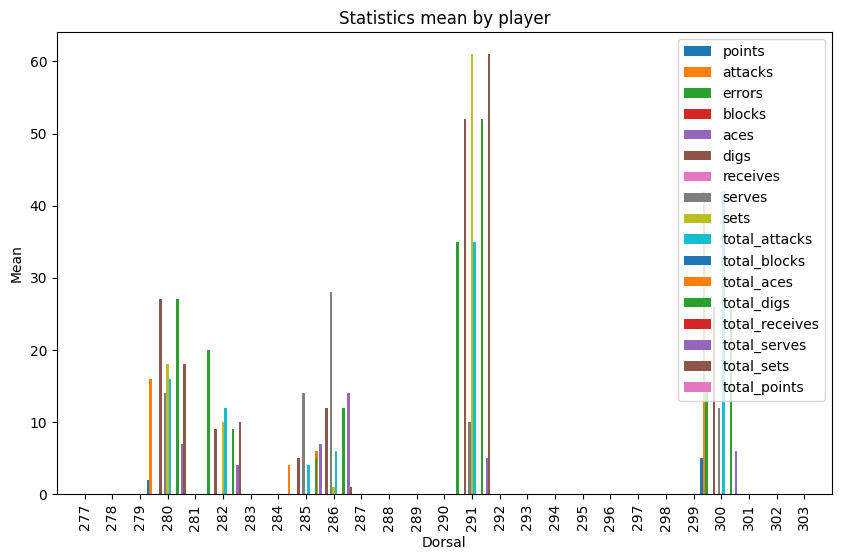

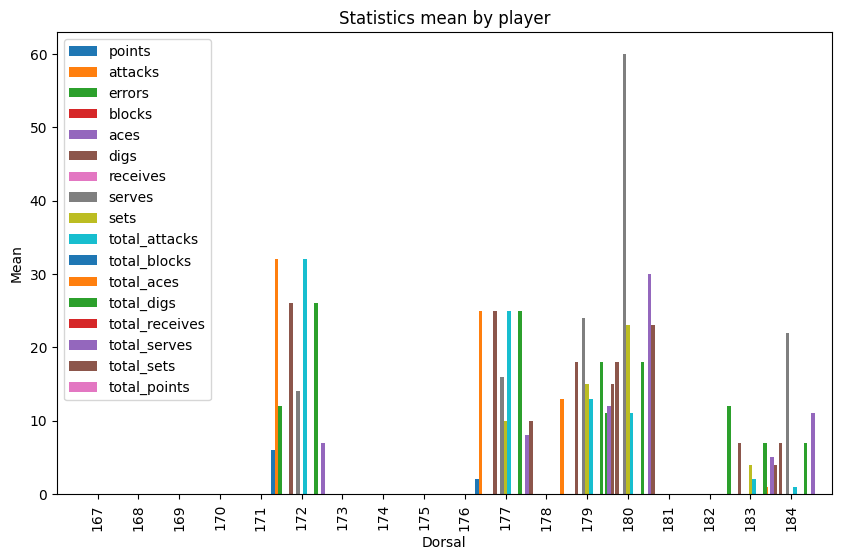

In [4]:
minimax_vs_minimax_action = SimulationAnalyzer('../data/all_random.json')
minimax_vs_minimax_action.analyze()

generate_statistics(minimax_vs_minimax_action, '../img/minimax_vs_minimax_action.png')

minimax_vs_smart_action

smart_line_up

/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,63.0,0.0,63.0,63.0,63.0,63.0
3,passes,36.0,0.0,36.0,36.0,36.0,36.0
4,errors,83.0,0.0,83.0,83.0,83.0,83.0


/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,64.0,0.0,64.0,64.0,64.0,64.0
3,passes,18.0,0.0,18.0,18.0,18.0,18.0
4,errors,49.0,0.0,49.0,49.0,49.0,49.0


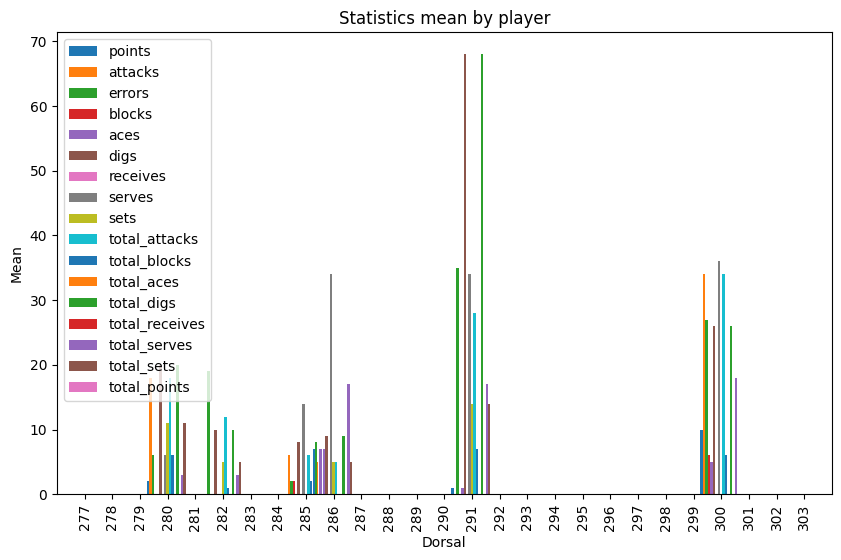

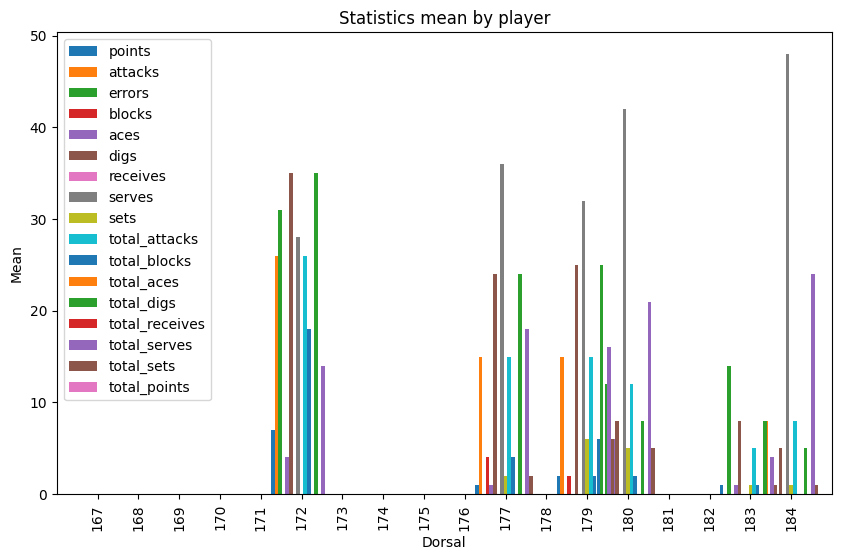

In [5]:
minimax_vs_smart_action = SimulationAnalyzer('../data/smart_line_up.json')
minimax_vs_smart_action.analyze()

generate_statistics(minimax_vs_smart_action, '../img/minimax_vs_smart_action.png')

smart_player

/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,105.0,0.0,105.0,105.0,105.0,105.0
3,passes,109.0,0.0,109.0,109.0,109.0,109.0
4,errors,69.0,0.0,69.0,69.0,69.0,69.0


/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,106.0,0.0,106.0,106.0,106.0,106.0
3,passes,77.0,0.0,77.0,77.0,77.0,77.0
4,errors,59.0,0.0,59.0,59.0,59.0,59.0


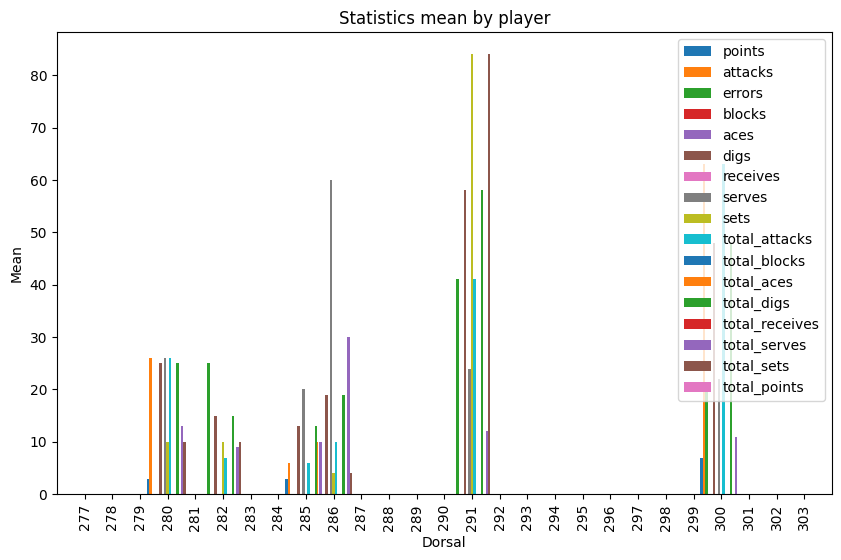

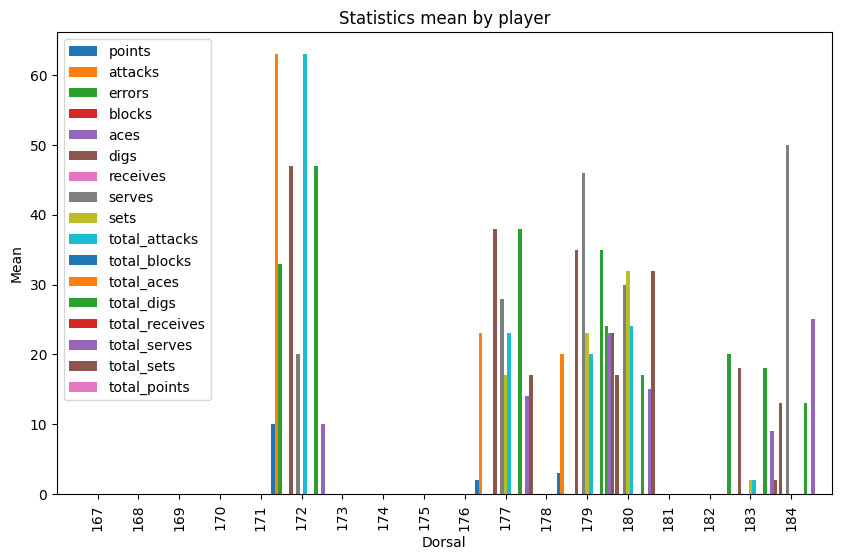

In [6]:
smart_player = SimulationAnalyzer('../data/smart_player.json')
smart_player.analyze()

generate_statistics(smart_player, '../img/smart_player.png')

smart_vs_random_line_up

/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,45.0,0.0,45.0,45.0,45.0,45.0
3,passes,29.0,0.0,29.0,29.0,29.0,29.0
4,errors,67.0,0.0,67.0,67.0,67.0,67.0


/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,41.0,0.0,41.0,41.0,41.0,41.0
3,passes,16.0,0.0,16.0,16.0,16.0,16.0
4,errors,17.0,0.0,17.0,17.0,17.0,17.0


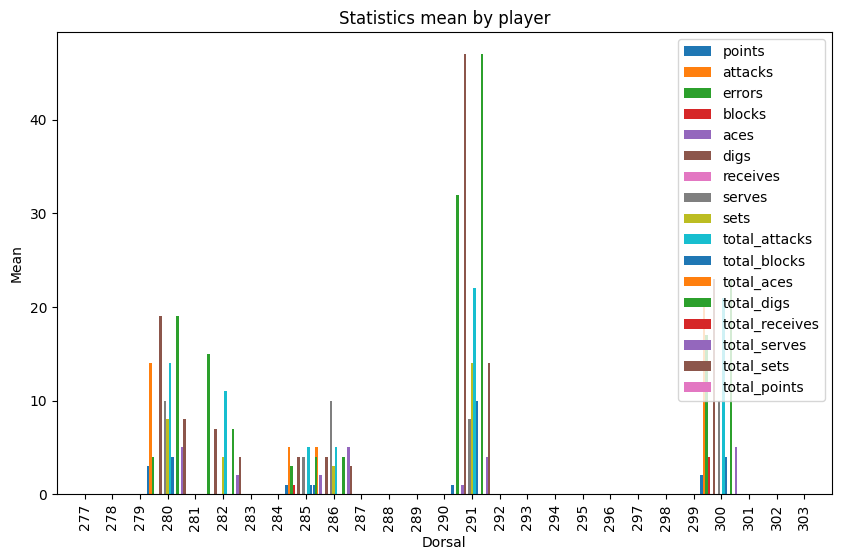

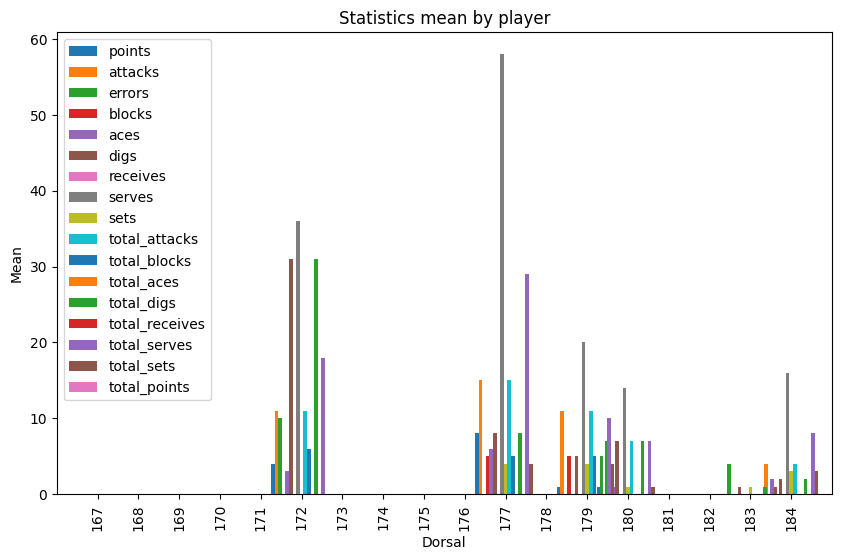

In [7]:
smart_vs_random_line_up = SimulationAnalyzer('../data/smart_vs_random_line_up.json')
smart_vs_random_line_up.analyze()

generate_statistics(smart_vs_random_line_up, '../img/smart_vs_random_line_up.png')

smart_vs_random_player

/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,75.0,0.0,75.0,75.0,75.0,75.0
3,passes,77.0,0.0,77.0,77.0,77.0,77.0
4,errors,67.0,0.0,67.0,67.0,67.0,67.0


/tmp/ipykernel_179990/3474591570.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_data_df], ignore_index=True)


,property,mean,std_dev,median,25th_percentile,50th_percentile,75th_percentile
0,points,0.0,0.0,0.0,0.0,0.0,0.0
1,serves,0.0,0.0,0.0,0.0,0.0,0.0
2,attacks,61.0,0.0,61.0,61.0,61.0,61.0
3,passes,22.0,0.0,22.0,22.0,22.0,22.0
4,errors,36.0,0.0,36.0,36.0,36.0,36.0


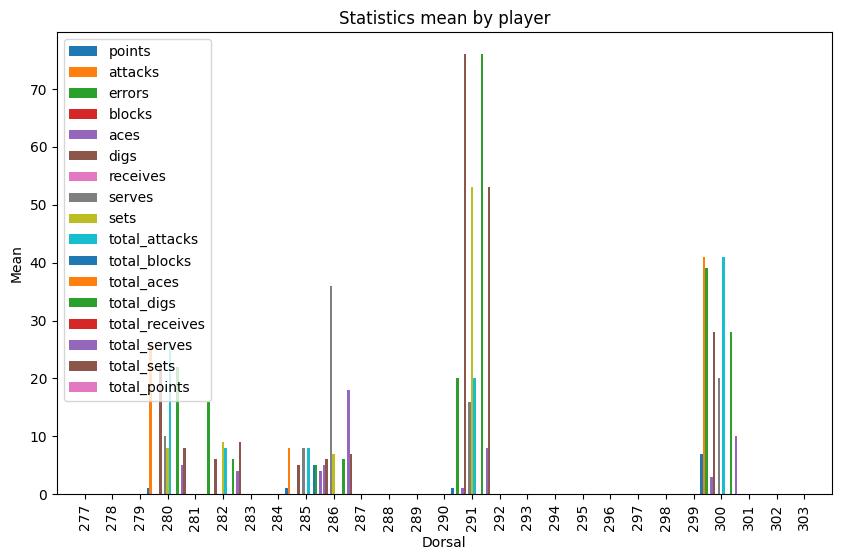

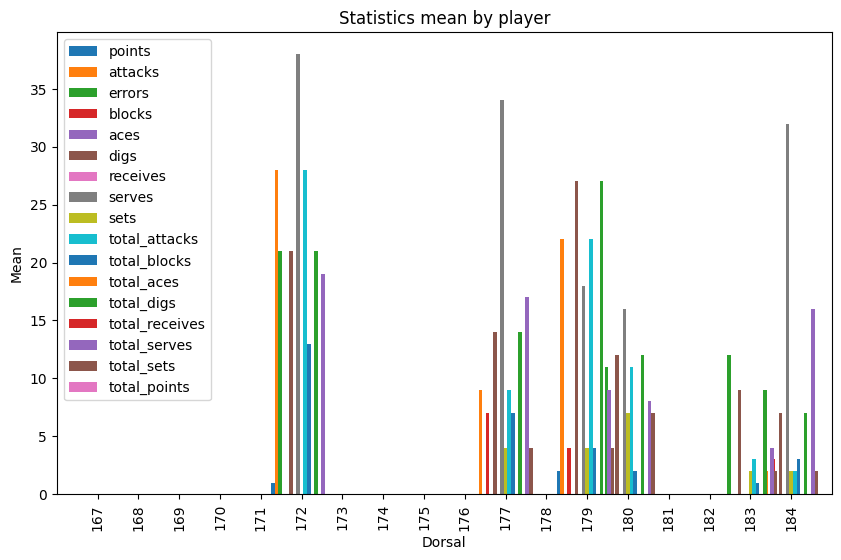

In [8]:
smart_vs_random_player = SimulationAnalyzer('../data/smart_vs_random_player.json')
smart_vs_random_player.analyze()

generate_statistics(smart_vs_random_player, '../img/smart_vs_random_player.png')